In [36]:
import os
import re
import pandas as pd

def extract_training_steps(directory, output_csv='training_steps_count.csv'):
    pattern = re.compile(r'_(\d{6})_')  
    
    step_counts = {step: 0 for step in range(200, 2600, 200)} 
    
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
            match = pattern.search(filename)
            if match:
                step = int(match.group(1))
                if step in step_counts:
                    step_counts[step] += 1
    
    df = pd.DataFrame(list(step_counts.items()), columns=['Training Step', 'Count'])
    df.sort_values(by='Training Step', inplace=True)
    df.to_csv(output_csv, index=False)
    
    print(f"Saved training step counts to {output_csv}")
    return df


In [37]:
df = extract_training_steps('./magnitude_artifact_images/')
df

Saved training step counts to training_steps_count.csv


,Training Step,Count
0,200,0
1,400,0
2,600,0
3,800,0
4,1000,0
5,1200,2
6,1400,3
7,1600,3
8,1800,2
9,2000,1


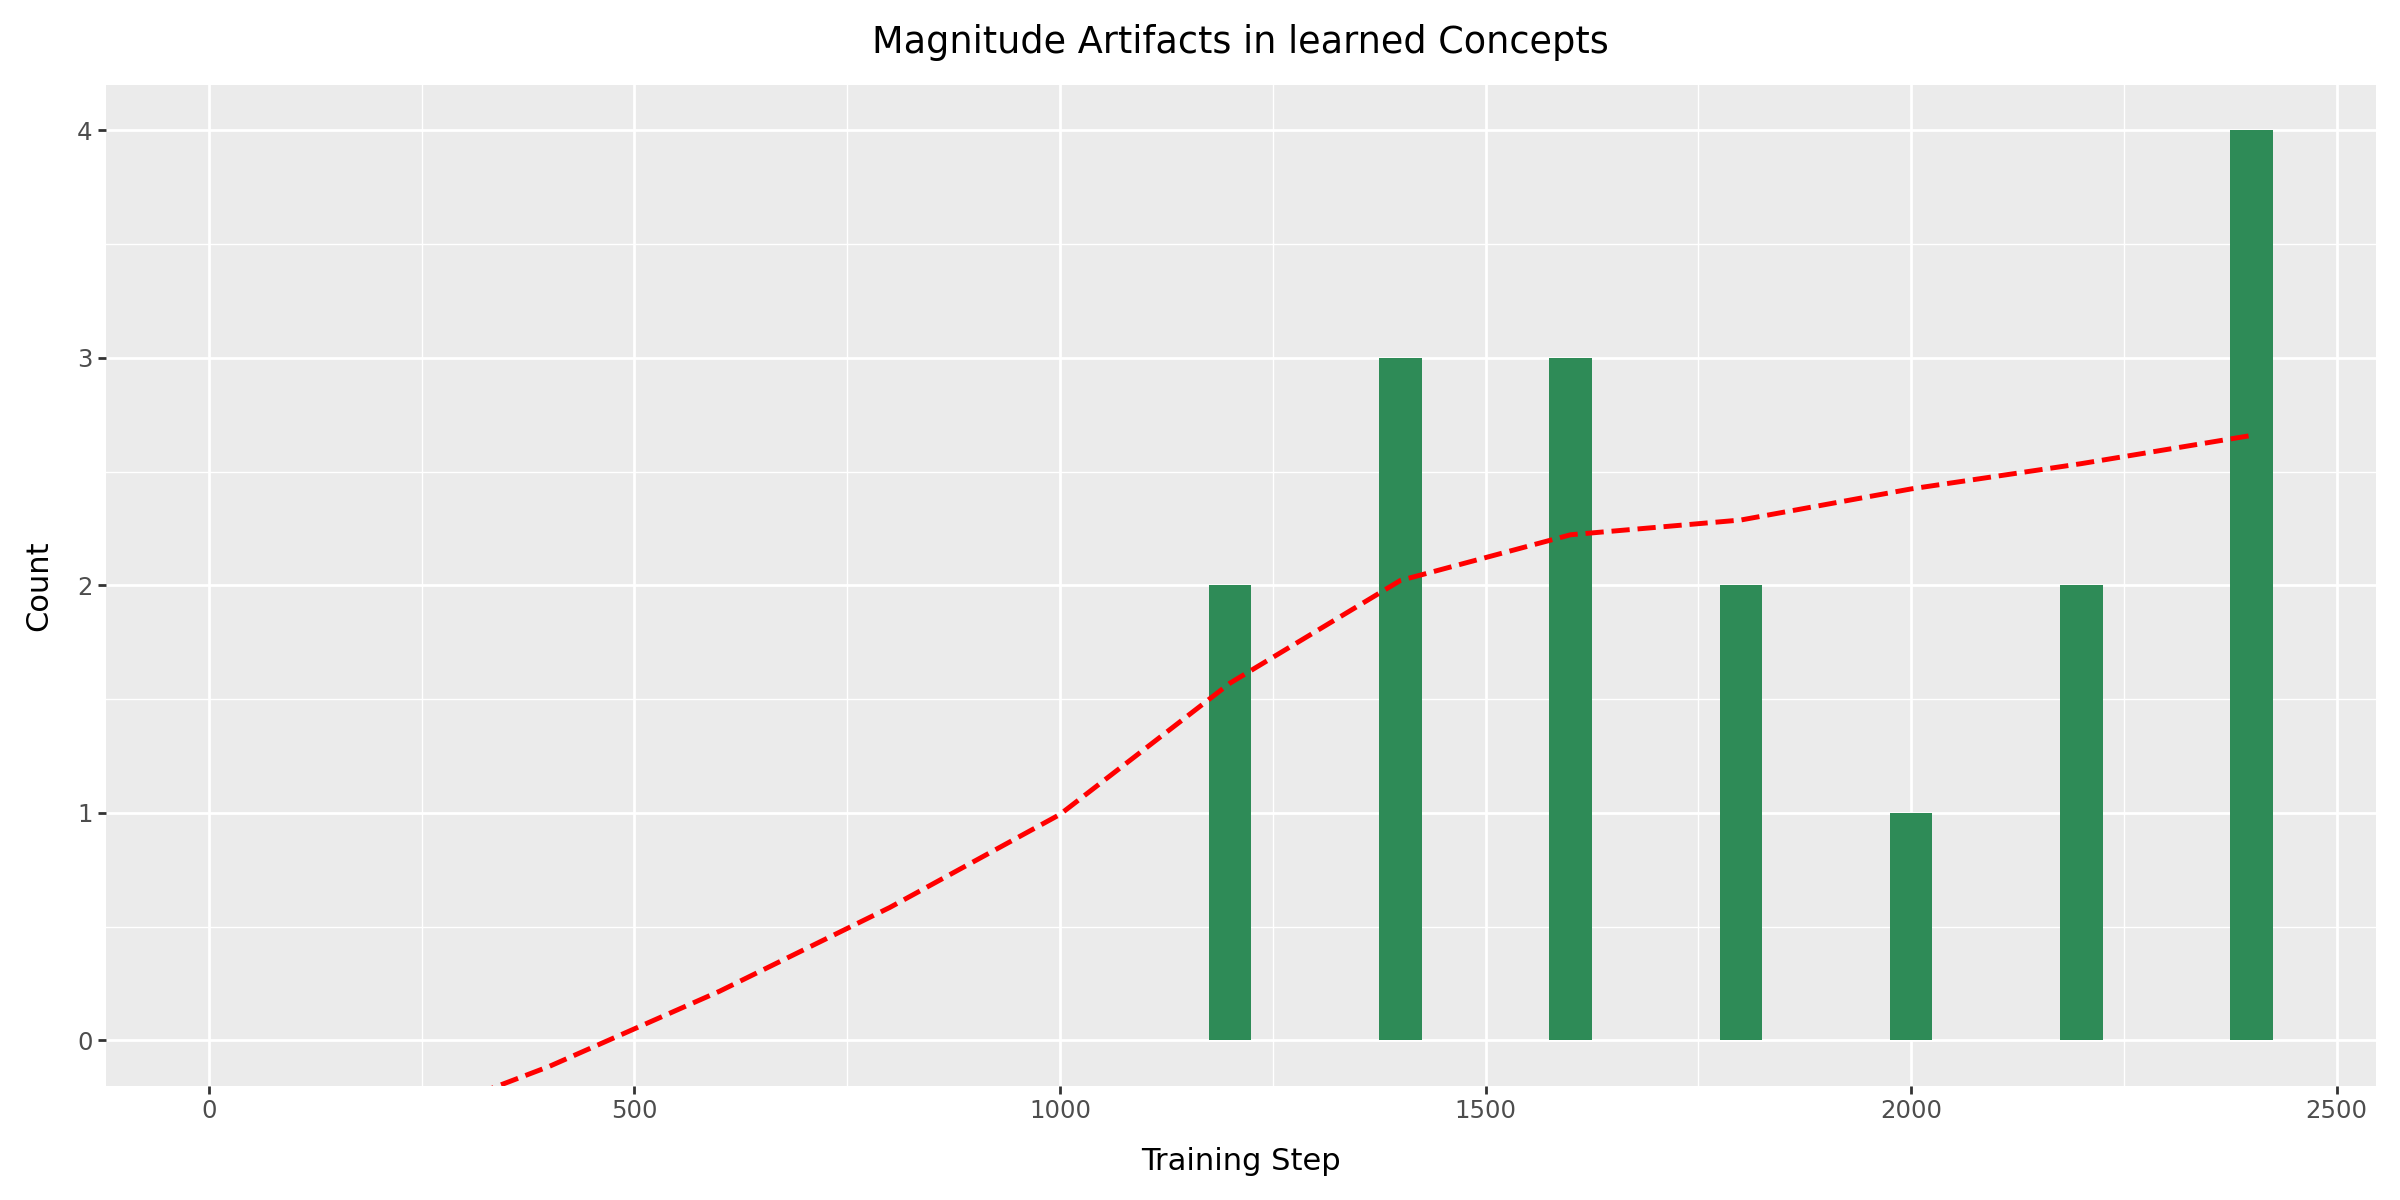

In [50]:
from plotnine import *
plot = (
    ggplot(df, aes(x="Training Step", y="Count")) +
    geom_bar(stat="identity", fill="seagreen", width=50) +  
    geom_smooth(method='lowess', color="red", linetype="dashed", se=False) +
    labs(title="Magnitude Artifacts in learned Concepts",
         x="Training Step", 
         y="Count")+
    coord_cartesian(xlim=(0, None), ylim=(0, None))+ theme(figure_size=(12, 6))
)
plot